# Multi-class Classification
Multi-class classification is the classification technique that allows us to categorize the test data into multiple class labels

Imbalanced Dataset: refers to a classification problem where the classes are not represented equally.

Here we are going to discuss with a 3-class classification problems with the ratio 3:1:1

# Domain Banking 
Dataset Loan Payment data
  
Objective : To perform classification on Loan_Status that contain three categories PAIDOFF,COLLETION AND COLLECTION_PAIDOFF 

Result: This anaysis will generate valuable insights for banks to consider which customer they will provide Loan to

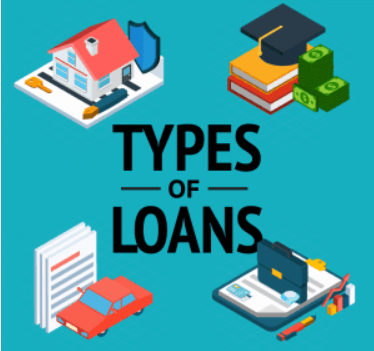

Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from pandas_profiling import ProfileReport
import seaborn as sns    # Visualization package
from warnings import filterwarnings
filterwarnings('ignore')
plt.style.use('seaborn')
from sklearn import preprocessing


Bad key "text.kerning_factor" on line 4 in
E:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Reading the data
%time
ln_data = pd.read_csv("C:/Users/FARSANA S/Desktop/Loan_Project/Loan payments data.csv")

Wall time: 0 ns


In [3]:
ln_data.head(10)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
5,xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,NaN,35,Master or Above,male
6,xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,NaN,29,college,male
7,xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,NaN,36,college,male
8,xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,NaN,28,college,male
9,xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,NaN,26,college,male


In [4]:
print(ln_data.shape)

(500, 11)


In [5]:
ln_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [6]:
ln_data.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

Observation: There are NAN variables in the column paid_off_time, past_due_days

In [7]:
#Before Investigation
profile = ProfileReport(ln_data)
profile.to_widgets()

Observation:
1. Drop the column Loan_ID which is not used for analysis
2. Based on the dataset analysis, missing values are not replaced, refer in section EDA

# Exploratory Data Analysis

For Reference from the dataset how the target labels are categorized:

PAIDOFF - paid_off_time <> '' & past_due_days = ''

COLLECTION - paid_off_time = '' & past_due_days <> ''

COLLECTION_PAIDOFF - paid_off_time <> '' & past_due_days <> ''

In [8]:
#Target Variable - Loan Status
ln_data.iloc[:,1].value_counts()

PAIDOFF               300
COLLECTION            100
COLLECTION_PAIDOFF    100
Name: loan_status, dtype: int64

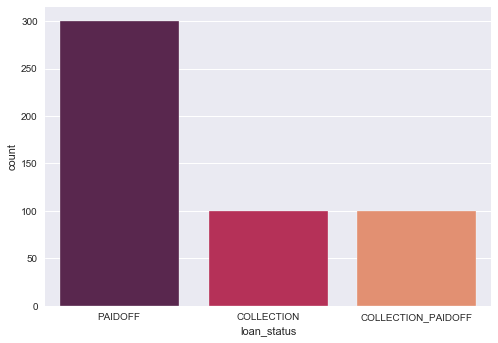

In [10]:
ln_st = sns.countplot(x = 'loan_status', data = ln_data, palette= 'rocket')

Observation : We have 3 labels for the target variable with the ratio 3:1:1

Lets start analyzing the columns in little detail

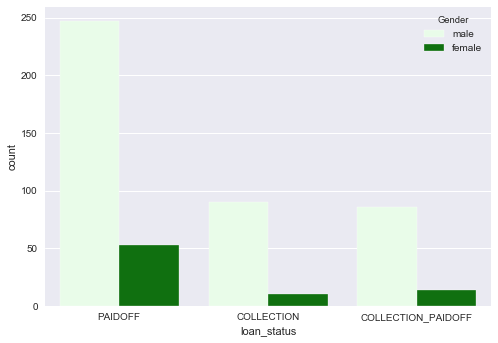

In [11]:
#Loan_status based on Gender
loan_status = sns.countplot(x = "loan_status" , data = ln_data, hue = 'Gender', color = 'g')

Observation: Males are getting more loans, seems males are having more responsibility:)

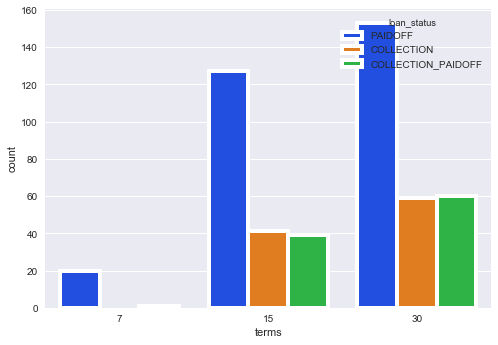

In [12]:
pay_off_Terms = sns.countplot(x = 'terms', data = ln_data, hue = 'loan_status', palette =  'bright' , linewidth = 4)

Observation: Very few people opted for weekly mode and most of them opted for  Monthly mode
Reason : Most of them are monthly salaried people

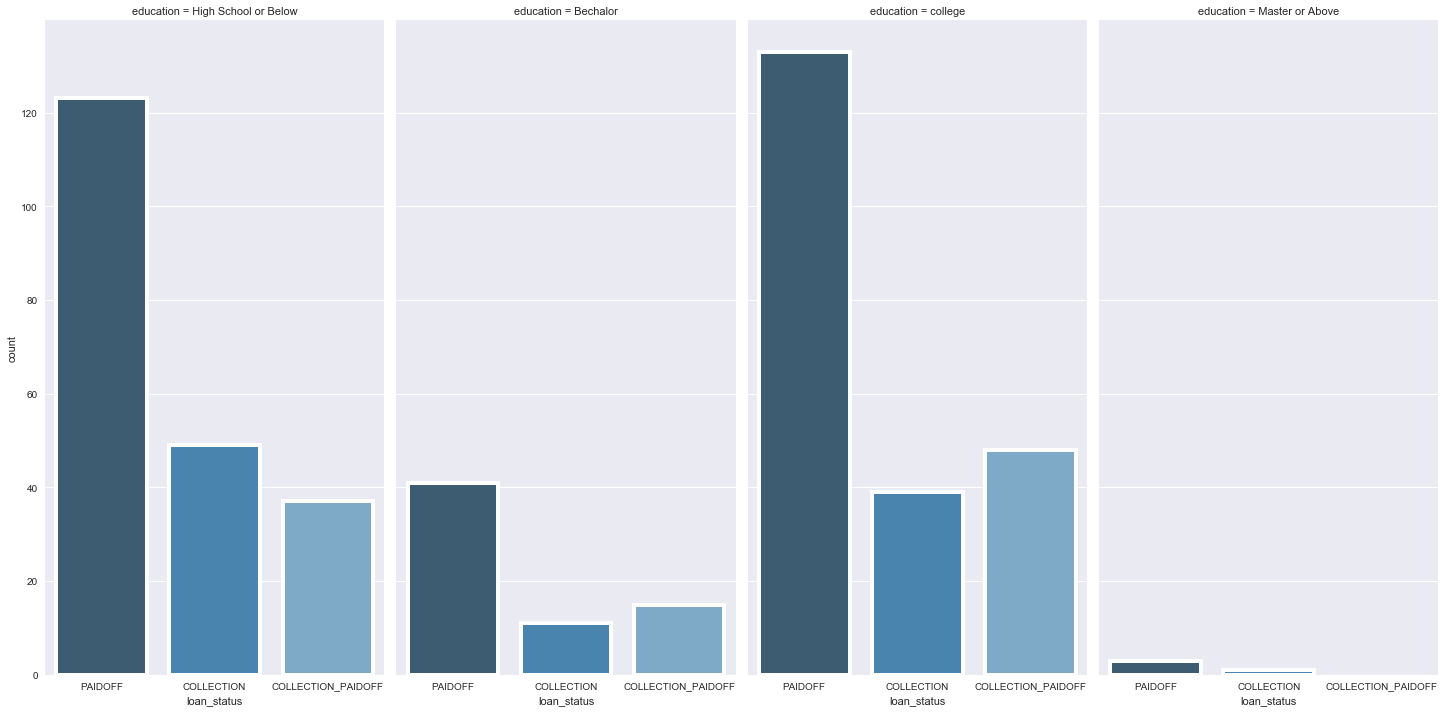

In [13]:
# lets compare the education with loan amount and payment status
Edu = sns.catplot('loan_status', col = 'education', col_wrap= 4, data = ln_data[ln_data.loan_status.notnull()], 
                  kind="count", height= 10, aspect = .5, palette= 'Blues_d' , linewidth = 4)

Observation:

1. Highschool& College : Applying most of the loans and Paying the loans properly
2. Bachelor - Few applicants received for loan  
3. Master Degree - Very few applicants received for loans

Data belongs to 2016, nowadays people are preferring master degrees in abroad, so the logic might changed for the current trend excluding COVID Situation:)

In [15]:
print('People paid off before due date: ', ln_data['past_due_days'].isnull().sum(), 'counts',"\U0001F600")
Paid_after = ((ln_data.shape[0]-ln_data['past_due_days'].isnull().sum())/ln_data.shape[0])*100
print(Paid_after,'% people paid loan after due days',"\U0001F61E")

People paid off before due date:  300 counts 😀
40.0 % people paid loan after due days 😞


([<matplotlib.patches.Wedge at 0x17dc8405bc8>,
 [Text(-1.0461621742897658, 0.3399186742226879, 'After due date'),
  Text(1.3314791714194014, -0.4326236425304377, 'Before due date')],
 [Text(-0.5706339132489631, 0.18541018593964795, '40%'),
  Text(0.8559508959124724, -0.2781151987695671, '60%')])

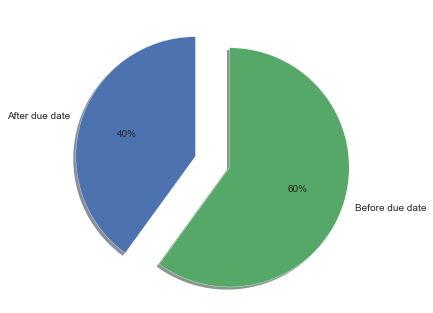

In [16]:
label_pie = 'After due date', 'Before due date'
sizes = [Paid_after, 100-Paid_after]
explode = (0,0.3)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = label_pie, autopct = '%1.0f%%', shadow = True, startangle = 90)

40% of the people paying the loans only after due date, not a good ratio:( for bank people

Let's dig further which category are not paying the loan properly

In [17]:
pd.crosstab(ln_data.loan_status, ln_data.Gender + ':' + ln_data.education)

col_0,female:Bechalor,female:High School or Below,female:college,male:Bechalor,male:High School or Below,male:Master or Above,male:college
loan_status,,,,,,,
COLLECTION,0,7,3,11,42,1,36
COLLECTION_PAIDOFF,1,5,8,14,32,0,40
PAIDOFF,12,19,22,29,104,3,111


In [18]:
pd.crosstab(ln_data.loan_status, ln_data.Gender + ':' +  ln_data.education, normalize = 'columns')


col_0,female:Bechalor,female:High School or Below,female:college,male:Bechalor,male:High School or Below,male:Master or Above,male:college
loan_status,,,,,,,
COLLECTION,0.000000,0.225806,0.090909,0.203704,0.235955,0.25,0.192513
COLLECTION_PAIDOFF,0.076923,0.161290,0.242424,0.259259,0.179775,0.00,0.213904
PAIDOFF,0.923077,0.612903,0.666667,0.537037,0.584270,0.75,0.593583


Excpetional: From the above 2 charts, feel like Vijay Mallya and other big shots are out of boundaries, thats the reson prediction failed in Big shot histories

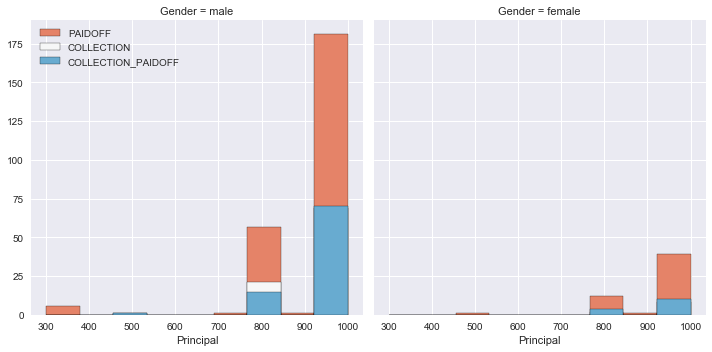

In [19]:
bins = np.linspace(ln_data.Principal.min(),ln_data.Principal.max(),10)
gen = sns.FacetGrid(ln_data, col = 'Gender',height= 5, hue = 'loan_status', palette = 'RdBu' ,col_wrap= 2)
gen.map(plt.hist, 'Principal', bins = bins ,ec = 'k')
gen.axes[-2].legend()

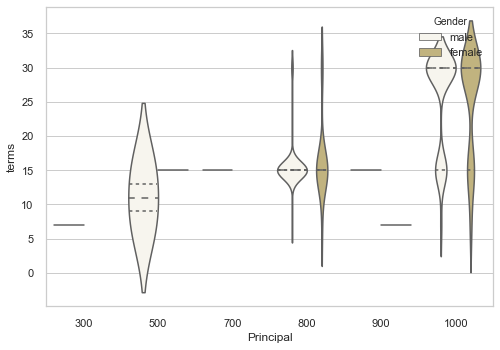

In [20]:
sns.set(style="whitegrid", palette= 'deep', color_codes= True)
sns.violinplot(x = 'Principal', y = "terms", hue = "Gender", spit = True, color = 'y' ,inner= 'quart', data = ln_data)
#sns.despine(left=False)

Observation: Only male candidate apply for the principal amount between 400 to 500
                  
             Female Candidate apply for the principal starting from 800, and only female candiadte apply for the principal greater than 1000

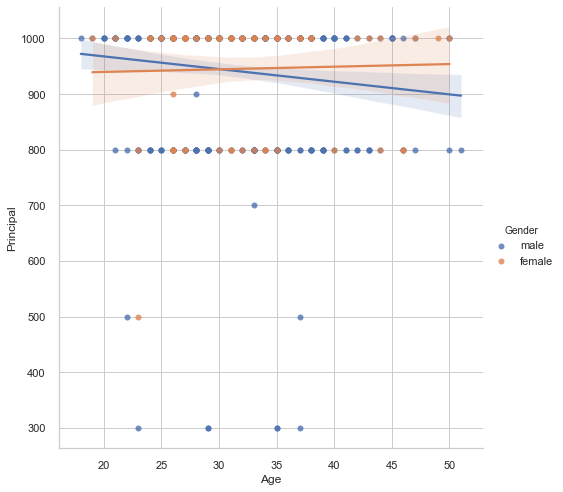

In [21]:
Ln_dist = sns.lmplot(x = 'age', y = 'Principal', hue = 'Gender', truncate= True, palette = 'deep', height= 7, data = ln_data)
Ln_dist.set_axis_labels('Age', 'Principal')

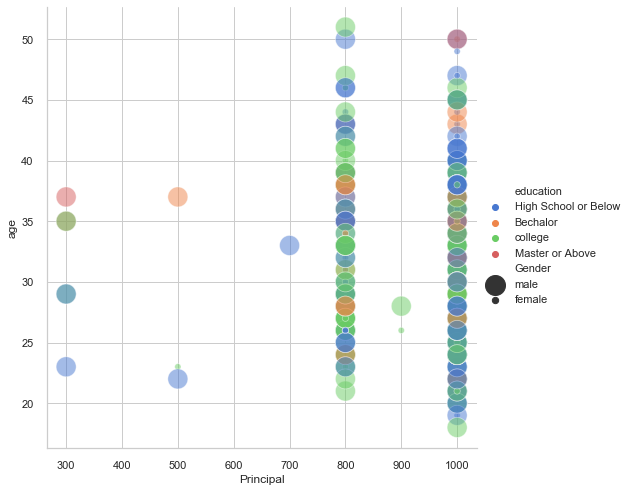

In [22]:
  sns.relplot(x = 'Principal', y = 'age', hue = 'education', size = 'Gender', sizes = (40,400), alpha = .5, 
             palette = 'muted', height = 7, data = ln_data)

Observation: Overall application for the higher principal amount-> 800,1000

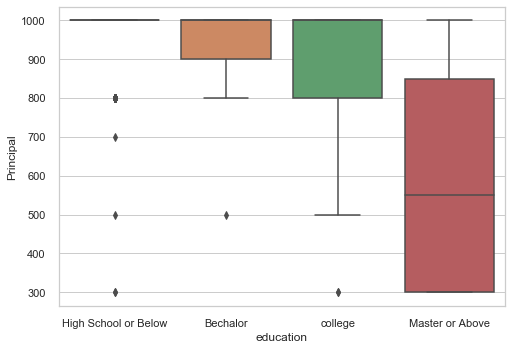

In [23]:
sns.boxplot(x = 'education',y = 'Principal', data = ln_data)

Observation: People going for better education opted for high Principal amount

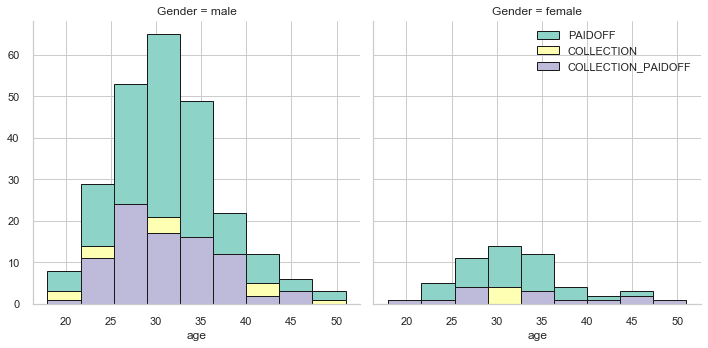

In [24]:
bins = np.linspace(ln_data.age.min(),ln_data.age.max(),10)
gen = sns.FacetGrid(ln_data, col = 'Gender', height = 5,  hue = 'loan_status', palette = 'Set3' ,col_wrap= 2)
gen.map(plt.hist, 'age', bins = bins ,ec = 'k')
gen.axes[-1].legend()

Observation: Between age 25 to 30 and 35 to 40 loans are paid proerly

             Female- Age between 30 to 35 not paying the loan properly

In [25]:
#Convert to date time object
ln_data['effective_date'] = pd.to_datetime(ln_data['effective_date'])
ln_data['due_date'] = pd.to_datetime(ln_data['due_date'])

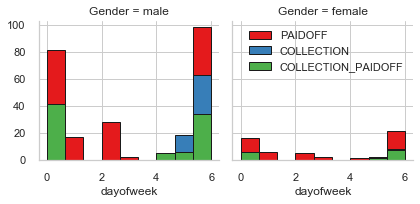

In [26]:
ln_data['dayofweek'] = ln_data['effective_date'].dt.dayofweek
bins = np.linspace(ln_data.dayofweek.min(),ln_data.dayofweek.max(),10)
gen = sns.FacetGrid(ln_data, col = 'Gender', hue = 'loan_status', palette = 'Set1' ,col_wrap= 2)
gen.map(plt.hist, 'dayofweek', bins = bins ,ec = 'k')
gen.axes[-1].legend()

Observtion: people who get loan at the end of the week are not paid properly

Result : We use Feature binarization with threshold value less than 4

In [27]:
ln_data['weekend'] = ln_data['dayofweek'].apply(lambda x : 1 if (x>3) else 0)
ln_data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,dayofweek,weekend
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/14/2016 19:31,NaN,45,High School or Below,male,3,0
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,10/7/2016 9:00,NaN,50,Bechalor,female,3,0
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/25/2016 16:58,NaN,33,Bechalor,female,3,0
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,9/22/2016 20:00,NaN,27,college,male,3,0
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,9/23/2016 21:36,NaN,28,college,female,4,1


In [28]:
ln_data.groupby(['Gender'])['loan_status'].value_counts(normalize = True)

Gender  loan_status       
female  PAIDOFF               0.688312
        COLLECTION_PAIDOFF    0.181818
        COLLECTION            0.129870
male    PAIDOFF               0.583924
        COLLECTION            0.212766
        COLLECTION_PAIDOFF    0.203310
Name: loan_status, dtype: float64

Observation: 68% of female pay their loans when compared to male,  Hurray female rocks with responsibility!!!!

In [29]:
print(ln_data[[ 'loan_status', 'Principal','Loan_ID']].groupby(['loan_status', 'Principal']).agg(['count']))

                             Loan_ID
                               count
loan_status        Principal        
COLLECTION         800            23
                   1000           77
COLLECTION_PAIDOFF 500             1
                   800            19
                   1000           80
PAIDOFF            300             6
                   500             2
                   700             1
                   800            69
                   900             2
                   1000          220


Overall Highlights

1. Male candidates apply wide variety of loans
2. Maximum Candidate opted for Monthly terms
3. Peope going for Bachelor degree applying for maximum loans
4. 60% of the people are paying the loan before due_data
5. Female candiadates applying for a loan with high Principal amont 
6. Age: 25-30 and 35-40 are paying the loan properly
7. People getting loan at the end of the weeks are not paying the loans properly

# Encoding Categorical data
   
   There are muliple techniques, in our dataset we used
   1. Replacing Values - Basic method, which is just replacing the categories with the desired numbers
   2. One-Hot Encoding - The basic stratergy is to convert each category into a new column and assig a 1 or 0         (True/false) value to the column. it solves the problem of unequal weights given to categories within a feature, Note: it's not very useful when there are many categories.

In [31]:
loan_data = ln_data

In [32]:
#dropping Loan_ID  which is not used for analysis
loan_data.drop('Loan_ID', axis = 1, inplace = True)

In [34]:
#remove duplicates
loan_data.drop_duplicates(inplace=True)

In [35]:
# Replacing Values : Male ->0 Female->1
loan_data['Gender'].replace(to_replace=['male','female'], value= [0,1], inplace = True)
loan_data.head()

,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/14/2016 19:31,NaN,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,10/7/2016 9:00,NaN,50,Bechalor,1,3,0
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/25/2016 16:58,NaN,33,Bechalor,1,3,0
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,9/22/2016 20:00,NaN,27,college,0,3,0
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,9/23/2016 21:36,NaN,28,college,1,4,1


Feature Selection/Extraction

In [37]:
#one hot encoding technique to convert categorical to binary variable
ft_ln = loan_data[['Principal','terms','age','Gender','dayofweek','weekend']]
ft_ln = pd.concat([ft_ln,pd.get_dummies(loan_data['education'])], axis = 1)
ft_ln.head(50)

,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,3,0,0,1,0,0
1,1000,30,50,1,3,0,1,0,0,0
2,1000,30,33,1,3,0,1,0,0,0
3,1000,15,27,0,3,0,0,0,0,1
4,1000,30,28,1,4,1,0,0,0,1
5,300,7,35,0,4,1,0,0,1,0
6,1000,30,29,0,4,1,0,0,0,1
7,1000,30,36,0,4,1,0,0,0,1
8,1000,30,28,0,4,1,0,0,0,1
9,800,15,26,0,5,1,0,0,0,1


In [38]:
ft_ln.drop('Master or Above', axis = 1, inplace = True) # Reasomn to delete all values end with 1

In [39]:
#After Investigation
profile1 = ProfileReport(loan_data)
profile1.to_widgets()

In [40]:
ft_ln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Principal             489 non-null    int64
 1   terms                 489 non-null    int64
 2   age                   489 non-null    int64
 3   Gender                489 non-null    int64
 4   dayofweek             489 non-null    int64
 5   weekend               489 non-null    int64
 6   Bechalor              489 non-null    uint8
 7   High School or Below  489 non-null    uint8
 8   college               489 non-null    uint8
dtypes: int64(6), uint8(3)
memory usage: 28.2 KB


# Model Building

In next section we discuss about Model Building, Standardization, Training and testing the model, Metrics of the model